### Shor's Algorithm - Quantum Factorization 

Shor's Algorithm is a quantum algorithm for integer factorization, which can efficiently factorize large numbers exponentially faster than the best-known classical algorithms. This capability poses a significant threat to classical encryption schemes, such as RSA, which rely on the difficulty of factorizing large integers.

Why is Shor's Algorithm important?
Shor's Algorithm demonstrates the potential of quantum computers to solve problems that are currently intractable for classical computers. This has profound implications for cryptography, cybersecurity, and various fields requiring large-number factorization.

Here's a simplified version in Qiskit to demonstrate the principle behind Shor's Algorithm:

Counts: {'0000': 1024}


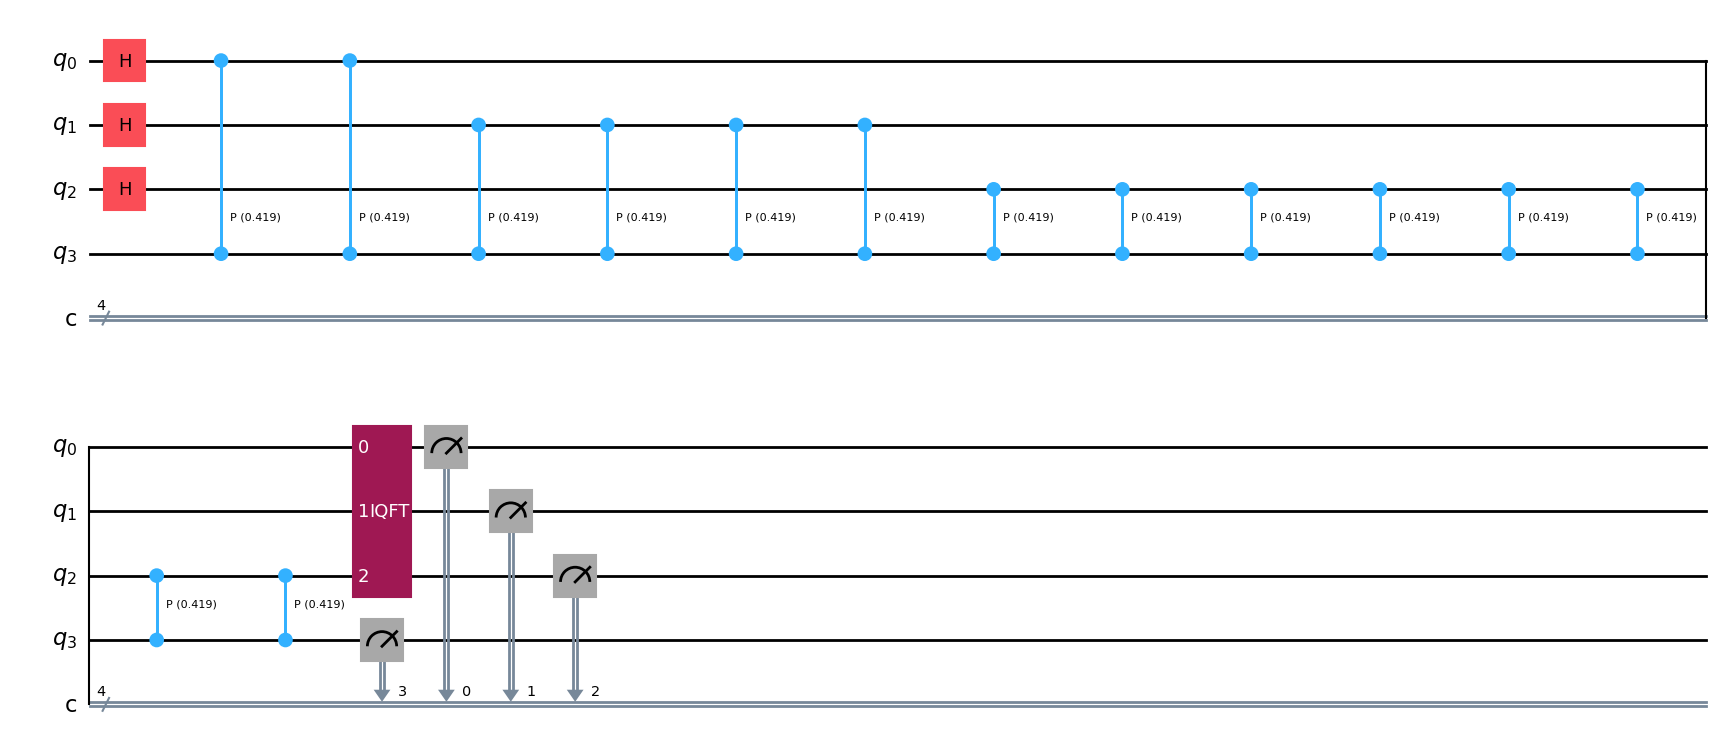

In [2]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to create controlled modular exponentiation (simplified)
def controlled_mod_exp(qc, base, exponent, modulus, control, target):
    for _ in range(exponent):
        qc.cp(2 * 3.1415 / modulus, control, target)

# Parameters for the algorithm (simplified example)
N = 15  # Number to factorize (example: 15 = 3 * 5)
base = 7  # A base integer for the modular exponentiation

# Create a Quantum Circuit
qc = QuantumCircuit(4, 4)

# Apply Hadamard gates to the first three qubits to create superposition
qc.h([0, 1, 2])

# Perform controlled modular exponentiation
controlled_mod_exp(qc, base, 2, N, 0, 3)
controlled_mod_exp(qc, base, 4, N, 1, 3)
controlled_mod_exp(qc, base, 8, N, 2, 3)

# Apply the inverse Quantum Fourier Transform
qc.append(QFT(3, do_swaps=False).inverse(), [0, 1, 2])

# Measure the qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Get the counts of outcomes
counts = result.get_counts()

print("Counts:", counts)

# Visualize the results
plot_histogram(counts)
plt.show()
qc.draw('mpl')


In this example, we create a quantum circuit to factorize the number 15. While this is a simplified version, it illustrates the core concepts of Shor's Algorithm, including controlled modular exponentiation and the Quantum Fourier Transform.

